In [1]:
from skimage import feature
from skimage import segmentation
from skimage import morphology
from scipy import ndimage
import numpy as np
#import argparse
#import imutils
#import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_mean

In [2]:
import os

path1 = 'C:/Users/eejmws/OneDrive - University of Leeds/Pytorch/'
path2 = 'C:/Users/jackm/OneDrive - University of Leeds/Pytorch/'
 
isdir1 = os.path.isdir(path1) 
isdir2 = os.path.isdir(path2) 

if isdir1 == True:
    os.chdir(path1)
elif isdir2 == True:
    os.chdir(path2)
else:
    print("directory not found")


In [3]:
from PIL import Image, ImageOps
im = Image.open('test2/results/picoutdepthUnettimm-mobilenetv3_small_075.png')
print(im.size)
im = ImageOps.grayscale(im)
 
# Cropped image of above dimension
# (It will not change original image)
#im1 = im.crop((0, 0, 500, 250))
 
# Shows the image in image viewer
#im1.show()
im.save('testdata/testoutputtemp.png')

(2397, 4286)


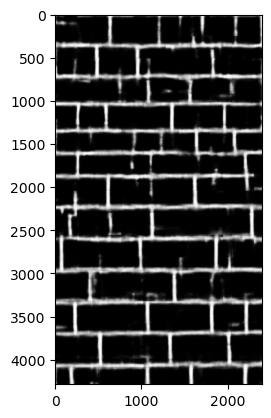

In [4]:
#img = Image.open('testdata/testoutputtemp.jpg')
img = Image.open('testdata/testoutputtemp.png')
imginv = img #ImageOps.invert(img)
imginv = np.array(imginv)
thresh = threshold_mean(img)
binary = img > thresh
img = np.array(img)
plt.imshow(img, cmap='gray')

In [5]:
img

array([[251, 251, 251, ..., 221, 221, 222],
       [251, 251, 252, ..., 227, 227, 228],
       [251, 251, 252, ..., 231, 231, 232],
       ...,
       [179, 186, 192, ...,  33,  34,  35],
       [178, 186, 192, ...,  33,  34,  35],
       [178, 186, 191, ...,  34,  34,  35]], dtype=uint8)

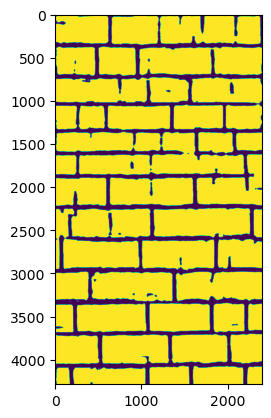

In [6]:
img2=(img < 100)
img3=(img2 < 50)
#img=img.astype(int)
plt.imshow(img2)

In [7]:
#sk = morphology.skeletonize(img2)

In [8]:
#plt.imshow(sk)

In [9]:
img3

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [10]:
imgb=imginv.astype(bool)

In [11]:
imgb

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

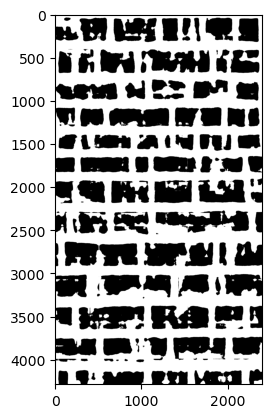

In [12]:
plt.imshow(imgb, cmap='gray')



kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
blur = cv2.GaussianBlur(opening,(1,1),0)
ret3,th4 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=1)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,3)

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = markers.astype('int32')

#now load same image as color image


markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

# find contours in the thresholded image
cnts = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)
# show the output image
plt.imshow(img, cmap='gray')

In [13]:
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(img2)

#morphology.h_minima(D)
#coords = peak_local_max(D, num_peaks=90)
#mask = np.zeros(D.shape, dtype=bool)
#mask[tuple(coords.T)] = True
#markers, _ = ndimage.label(mask)
#labels = watershed(~sk)#,markers, mask=img)
#labels2= watershed(mask)


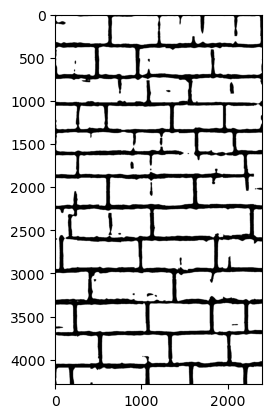

In [14]:
plt.imshow(img2, cmap='gray')


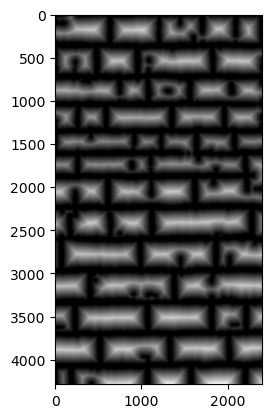

In [15]:
plt.imshow(D, cmap='gray')

In [18]:
D2 = D/255

In [16]:
#segmentation.random_walker(D, labels)

In [17]:
#segmentation.flood_fill(D, seed_point, new_value, *, footprint=None, connectivity=None, tolerance=None, in_place=False)

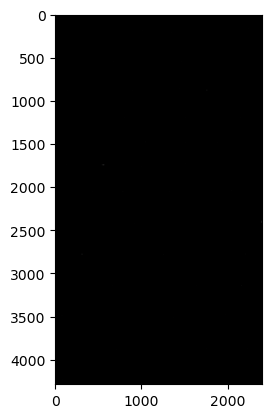

In [54]:
maxima= morphology.h_maxima(D, 40)
plt.imshow(maxima, cmap='gray')


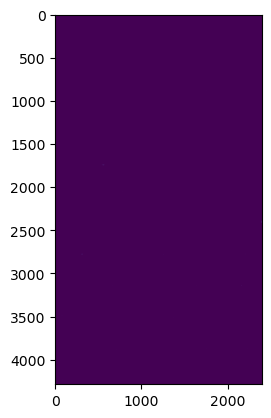

In [55]:
markers, _ = ndimage.label(maxima)
plt.imshow(markers)

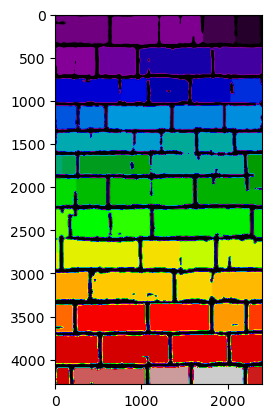

In [56]:
labels2 = segmentation.watershed(-D,markers, mask = img2)
plt.imshow(labels2, cmap=plt.cm.nipy_spectral)

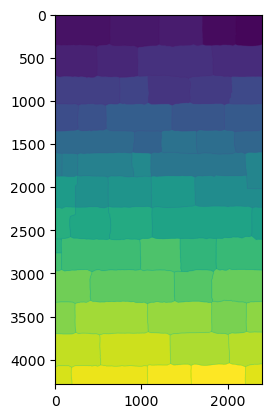

In [57]:
labels3 = segmentation.watershed(-D,markers, watershed_line=True)

plt.imshow(labels3)

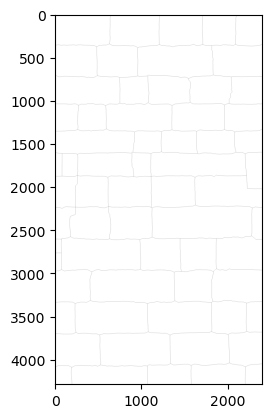

In [58]:
labels4 = labels3>0.5
plt.imshow(labels4, cmap='gray')

In [59]:
labels4 = morphology.binary_erosion(labels4, footprint=None, out=None)
labels4 = morphology.binary_erosion(labels4, footprint=None, out=None)
labels4 = morphology.binary_erosion(labels4, footprint=None, out=None)

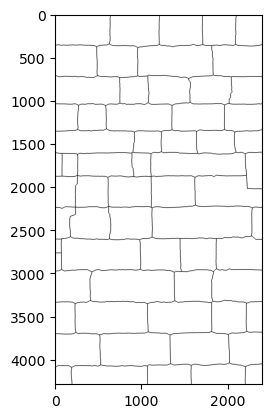

In [60]:
plt.imshow(labels4, cmap='gray')

In [63]:
labels4s= Image.fromarray(labels4)
labels4s.save("test2/results/watersheddepthUnettimm-mobilenetv3_small_075.png")

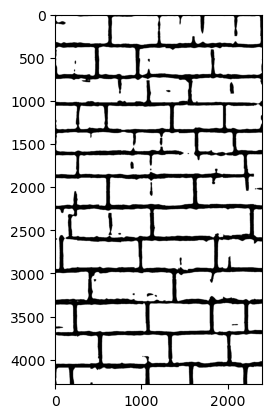

In [62]:
plt.imshow(img2, cmap='gray')


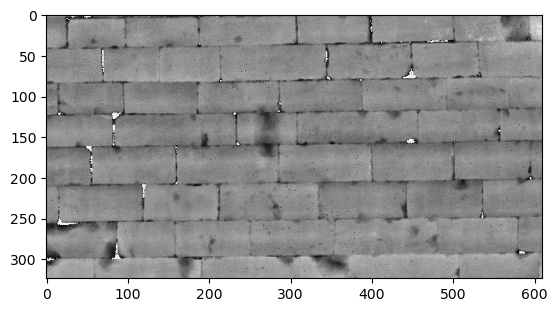

In [27]:
pic = Image.open("testdata/testimg.jpg").convert('L')

plt.imshow(pic, cmap='gray')

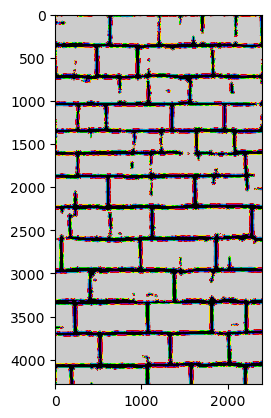

In [28]:
plt.imshow(img2, cmap=plt.cm.nipy_spectral)

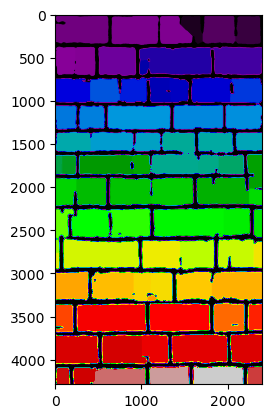

In [29]:
plt.imshow(labels2, cmap=plt.cm.nipy_spectral)

In [30]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
	# if the label is zero, we are examining the 'background'
	# so simply ignore it
	if label == 0:
		continue
	# otherwise, allocate memory for the label region and draw
	# it on the mask
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	# detect contours in the mask and grab the largest one
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	# draw a circle enclosing the object
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
	cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# show the output image
cv2.imshow("Output", image)
cv2.waitKey(0)


NameError: name 'labels' is not defined

In [ ]:
plt.imshow(opening, cmap='gray')

In [ ]:
plt.imshow(opening, cmap='gray')

In [ ]:
blockno = 14
blockextract = (labels3 == blockno).astype(np.uint8)
plt.imshow(blockextract, cmap='gray')

In [ ]:
blockno = 15
blockextract = (labels3 == blockno).astype(np.uint8)
plt.imshow(blockextract, cmap='gray')

In [ ]:
blockno = 16
blockextract = (labels3 == blockno).astype(np.uint8)
plt.imshow(blockextract, cmap='gray')

In [ ]:
blockno = 17
blockextract = (labels3 == blockno).astype(np.uint8)
plt.imshow(blockextract, cmap='gray')

In [ ]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
    # draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.putText(image, "#{}".format(i + 1), (int(x) - 10, int(y)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
# show the output image
cv2.imshow("Image", image)
cv2.waitKey(0)

In [ ]:
kernel = np.ones((2,2),np.uint8)
opening = cv.morphologyEx(img,cv.MORPH_OPEN,kernel, iterations = 2)
#closing = cv.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
sure_bg = cv.dilate(img,kernel,iterations=3)

dist_transform = cv.distanceTransform(img,cv.DIST_L2,3)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)
# Finding unknown region
#sure_fg = np.uint8(sure_fg)
#unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

water = cv.watershed(img,)

In [ ]:
plt.imshow(opening, cmap='gray')

In [ ]:
plt.imshow(dist_transform, cmap='gray')

In [ ]:
plt.imshow(sure_fg, cmap='gray')

In [ ]:
plt.imshow(markers, cmap='gray')

In [ ]:
plt.imshow(water, cmap='gray')

In [ ]:
plt.imshow(sure_fg, cmap='gray')

In [ ]:



# Perform the distance transform algorithm
dist = cv.distanceTransform(img, cv.DIST_L2, 3)
# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it
cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
cv.imshow('Distance Transform Image', dist)

In [ ]:
img